# Winter 2022 Data Science Intern Challenge for Shopify

## Question 1

### Problem Statement: <br>
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

Lets first start by loading in and taking a look at the data:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('shopify_data.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Now lets take a look at the columns that seem to be relevant to this calculation of AOV:

In [4]:
df.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

In [5]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [13]:
df[df.order_amount == df.order_amount.max()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,total_revenue,total_orders,aov
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,16065.0,105.0,153.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,16461.0,93.0,177.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,NaN,NaN,NaN
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,NaN,NaN,NaN
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,NaN,NaN,NaN
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,NaN,NaN,NaN
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,NaN,NaN,NaN
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,NaN,NaN,NaN
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,NaN,NaN,NaN
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,NaN,NaN,NaN


1a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
<br>
<br>
From the above cell, it seems clear that this naive approach to calculating the AOV is being done by averaging the order_amount column across all 100 shops, over the 30 day window. The high $3145.13 value for a relatively affordable item, stems from the max value of 704000 orders from shop 42.

Now, lets think about a better way to go about evaluating the AOV. From the following [Shopify blog post](https://www.shopify.com.ng/blog/average-order-value#averageorder), AOV has been defined by: **AOV = Total Revenue / Total Number of Orders.**<br>
So now lets calculate the total revenue and the total number of orders for each shop, so that we can find the corresponding AOV for each shop.<br> Then we'll calculate the mean AOV of all shops and go from there.

First lets check if there are any null values for the columns that we'll be using:

In [19]:
print("Number of null values for column total_items: ", df.total_items.isnull().sum())
print("Number of null values for column order_amount: ", df.order_amount.isnull().sum())

Number of null values for column total_items:  0
Number of null values for column order_amount:  0


From the above cell, we can see that there are no null values in these columns, so we can go ahead with calculating our new AOV. <br>
*Note- if there were any null values in these columns, one method to deal with them would be to replace the null values of that column with the mean or median value for that shop, as opposed to ignoring the null values altogether in our calculations.*

In [21]:
df['total_revenue'] = df['order_amount'].groupby(df['shop_id']).sum()
df['total_orders'] = df['total_items'].groupby(df['shop_id']).sum()
df['aov'] = df['total_revenue']/df['total_orders']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,total_revenue,total_orders,aov
0,1,53,746,224,2,cash,2017-03-13 12:36:56,NaN,NaN,NaN
1,2,92,925,90,1,cash,2017-03-03 17:38:52,13588.0,86.0,158.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,9588.0,102.0,94.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,14652.0,99.0,148.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,13184.0,103.0,128.0


In [7]:
mean_aov = df['aov'].mean()
print(mean_aov)

407.99


From the above cell, we see that the AOV would be $407.99. However, this value still seems high for an item such as sneakers, especially if each of these shops only sells one model of shoe.<br> So let's explore some more.

I'm going to create a boxplot to plot the AOV of each shop. This will show us if there are clearly any outliers that're causing our mean AOV to be so high.

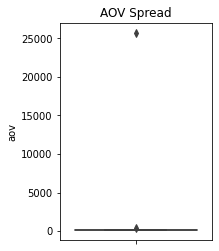

In [9]:
plt.subplot(1,2,2)
plt.title('AOV Spread')
sns.boxplot(y=df.aov)
plt.show()

In [26]:
df.aov.describe()

count      100.000000
mean       407.990000
std       2557.462906
min         90.000000
25%        132.750000
50%        153.000000
75%        168.250000
max      25725.000000
Name: aov, dtype: float64

In [27]:
df[df.aov == df.aov.max()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,total_revenue,total_orders,aov
78,79,8,806,132,1,credit_card,2017-03-27 3:39:39,2263800.0,88.0,25725.0


From the boxplot and the above 2 cells, we can see there is one AOV value ($25725.00 from shop 8) that is much higher than the rest. In order to minimize its affect on the AOV value we'd like to calculate the median AOV:

In [28]:
median_aov = df['aov'].median()
print(median_aov)

153.0


1b)  What metric would you report for this dataset?
<br>
<br>
I would report the median AOV value across all shops. This was calculated by finding the AOV value for each shop, and then calculating the median across all shops. This method reduced the effect of outliers and ensured that we had a more accurate value for the average order value, when looking at order data over a 30 day window.
<br>
<br>
1c)  What is its value?
<br>
<br>
$153 (which seems much more reasonable than our previous answer of $407.99).

## Question 2

### How many orders were shipped by Speedy Express in total?
*54 orders were shipped by Speedy Express.*

SELECT COUNT(ShipperID) FROM Orders <br>
WHERE Orders.ShipperID = 1;

![alt text](Q1.png "Title")

### What is the last name of the employee with the most orders?
*His last name was Peacock.*

SELECT Employees.LastName <br>
FROM Employees <br>
WHERE (SELECT Orders.EmployeeID <br>
FROM Orders <br>
GROUP BY Orders.EmployeeID <br>
ORDER BY COUNT(Orders.EmployeeID) DESC <br>
LIMIT 1) = Employees.EmployeeID;

![alt text](Q2.png "Title")

### What product was ordered the most by customers in Germany?
*Boston Crab Meat was ordered the most.*

SELECT Products.ProductName, SUM(OrderDetails.Quantity) as TotalOrders <br>
FROM Products, Orders, OrderDetails, Customers <br>
WHERE Products.ProductID = OrderDetails.ProductID AND OrderDetails.OrderID = Orders.OrderID AND Orders.CustomerID = Customers.CustomerID AND Customers.Country = "Germany" <br>
GROUP BY Products.ProductID <br>
ORDER BY TotalOrders DESC <br>
LIMIT 1;

![alt text](Q3.png "Title")